<a href="https://colab.research.google.com/github/EsraaMosaad/Practice-ML/blob/main/HEART_DISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
dataset=pd.read_csv('/content/dataset.csv')

dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **1. Check for missing value**

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **2. Check For Duplicate Data and Drop Them**

In [ ]:
dataset.duplicated().any()

True

In [ ]:
dataset=dataset.drop_duplicates()
dataset.shape

(302, 14)

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [ ]:
correlation=dataset.corr()

<Axes: >

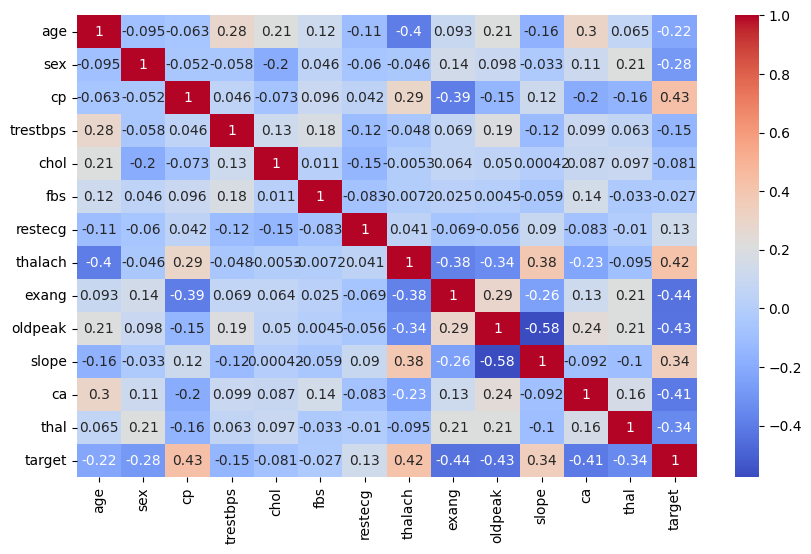

In [ ]:
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(correlation, annot=True, cmap='coolwarm')  # 'coolwarm' is a colormap choice


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

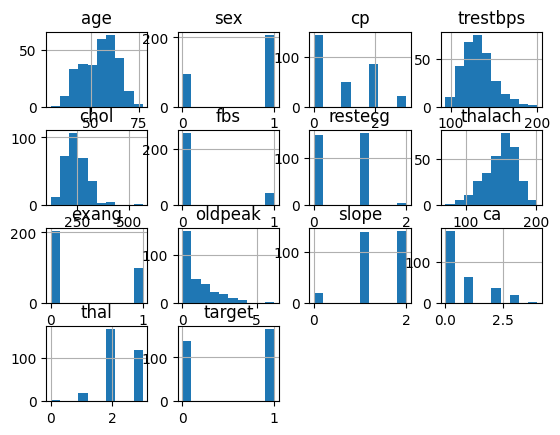

In [ ]:
dataset.hist()

In [ ]:
columns_to_encode = ['sex','cp','fbs','restecg','slope','exang','ca','thal']
df=pd.get_dummies(dataset, columns =columns_to_encode,dtype=int)

In [ ]:
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1


In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [ ]:
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0.478910,-0.106449,-1.161988,-0.727060,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
299,-1.042904,-1.232023,0.338703,-0.768384,0.135360,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503322,0.707035,-1.035462,-0.374779,2.032684,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.285561,-0.091401,-2.235438,-1.511859,0.135360,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        302 non-null    float64
 1   trestbps   302 non-null    float64
 2   chol       302 non-null    float64
 3   thalach    302 non-null    float64
 4   oldpeak    302 non-null    float64
 5   target     302 non-null    int64  
 6   sex_0      302 non-null    int64  
 7   sex_1      302 non-null    int64  
 8   cp_0       302 non-null    int64  
 9   cp_1       302 non-null    int64  
 10  cp_2       302 non-null    int64  
 11  cp_3       302 non-null    int64  
 12  fbs_0      302 non-null    int64  
 13  fbs_1      302 non-null    int64  
 14  restecg_0  302 non-null    int64  
 15  restecg_1  302 non-null    int64  
 16  restecg_2  302 non-null    int64  
 17  slope_0    302 non-null    int64  
 18  slope_1    302 non-null    int64  
 19  slope_2    302 non-null    int64  
 20  exang_0    302 

<Axes: xlabel='target'>

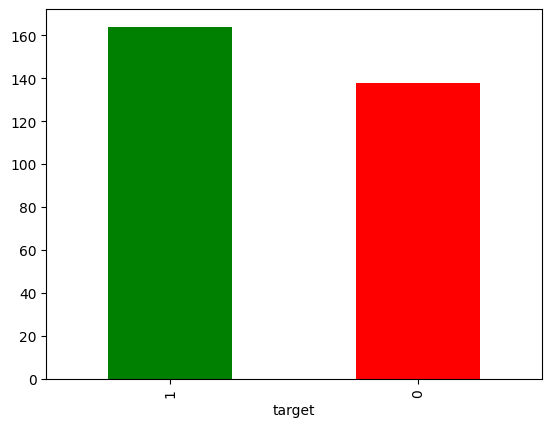

In [ ]:
df['target'].value_counts().plot(kind='bar',color=['green', 'red'])

In [ ]:
dataset.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.125000,0.572917,151.12500,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.834951,0.927184,130.912621,239.601942,0.160194,0.504854,148.84466,0.373786,1.120874,1.383495,0.796117,2.402913,0.446602


<Axes: xlabel='age', ylabel='chol'>

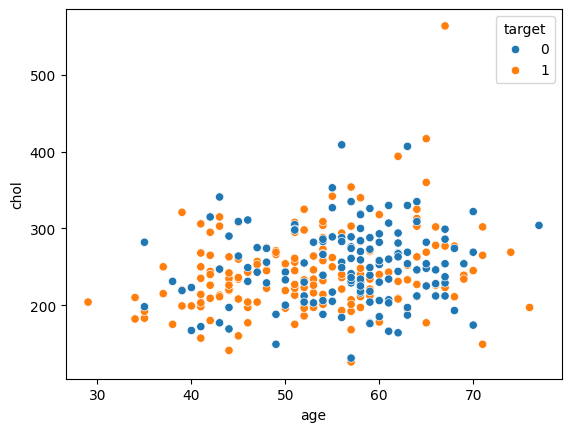

In [ ]:
# valued 0 = no disease and 1 = disease.
# cp chest pain type
  # typical angina.
  # atypical angina.
  # non-anginal.
  # asymptomatic.
sns.scatterplot(data=dataset,x='age',y='chol',hue='target')#chol-->serum cholestoral

# **Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Split the dataset into features (X) and target variable (y)
y = df['target']
X = df.drop('target', axis=1)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(241, 30)

In [ ]:
#LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
#DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
#KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
#SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

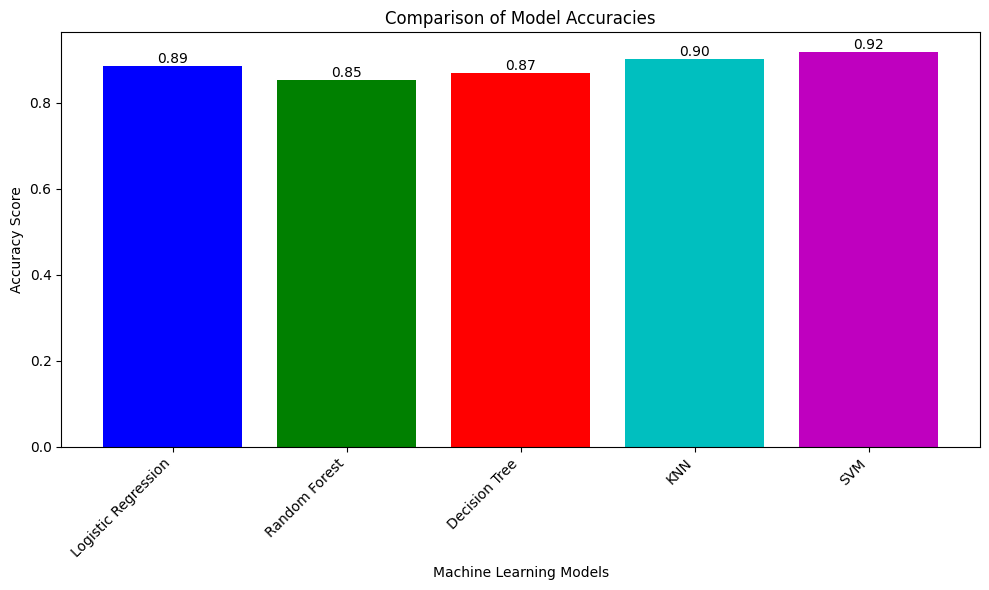

In [ ]:
# Calculate accuracy for each model
models = ["Logistic Regression", "Random Forest", "Decision Tree", "KNN", "SVM"]
accuracy = []
for model_name, y_predicted in zip(models, [y_pred, rf_y_pred, dt_y_pred, knn_y_pred, svm_y_pred]):
    accuracy.append(accuracy_score(y_test, y_predicted))



# Create the bar chart
plt.figure(figsize=(10, 6))
bars =plt.bar(models, accuracy, color=['b', 'g', 'r', 'c', 'm'])
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
# Add accuracy values on top of each bar
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.2f}', ha='center', va='bottom')
plt.show()